# SVM Parameters

Each Machine Learning algorithm has specific parameters that affect its performance. For Support Vector Machines, the main parameters are:
- 'C'
- 'Kernel'
- 'Gamma'

You already know that 'C' manages the error function according to the Support Vectors.

In this exercice, you will explore the other two parameters.

Run the following code. It imports the packages, data, and creates plotSVM(), a function you will use to visualize parameters.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets
import pandas as pd
from sklearn.model_selection import GridSearchCV

iris = datasets.load_iris() # Load dataset as "iris"

X = iris.data[:, :2] # Keep only 2 first features, Sepal Lenght and Sepal Width

y = iris.target # Load targets

def plotSVM(title): 
    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 #From Sepal lenght (X[0])Set X axis min to lowest data point -1, X axis max to highest data point +1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 #From Sepal Width (X[1])Set Y axis min to lowest data point -1, Y axis max to highest data point +1
    h = 0.01 #Set delimiting line width 
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) #Create rectangular grid out of two one dimensional arrays
    
    Z = svc.predict(np.c_[xx.ravel(), yy.ravel()]) #Fit data to SVM
    Z = Z.reshape(xx.shape) #Convert to compatible 2D array shape
    
    plt.subplot(1, 1, 1) #Set dimensions of plot
    plt.contourf(xx, yy, Z, cmap=plt.cm.tab20) #Show delimiter and area and pick color
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.tab20) #Show data points and pick color
    plt.xlabel('Sepal length') #Label X axis
    plt.ylabel('Sepal width') # Label y axis
    plt.title(title) #Print Title
    

    plt.show()

## Kernel 

The Kernel parameter defines which type of hyperplane separates the data.

In the case of 2D data, a linear hyperplane is used. Remember when you plotted the Support Vectors in exercice 02? The data was separable by a single line.

In the case of more complex data, Radial Basis Function (rbf) or polynomial hyperplanes will typically do a better job, as they can take more complex shapes.

Make a list of the 3 kernel names as they are referred to in the [[doc]](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html).

In [4]:
kernels = ['linear', 'rbf', 'poly'] # List the different kernels to use

Complete the following for-loop to train and plot a model for each kernel. The `plotSVM()` function takes the kernel name as argument.

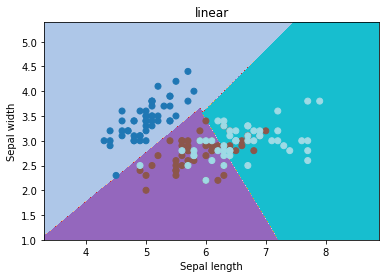

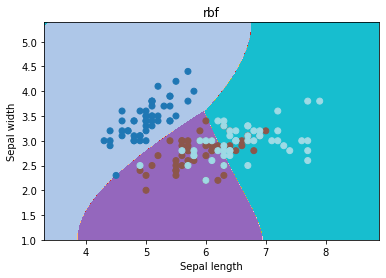

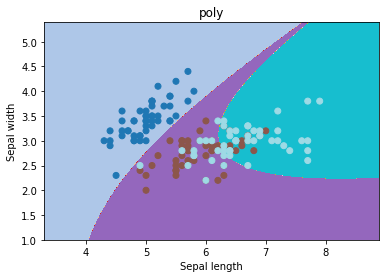

In [6]:
for kernel in kernels: # For each element in the list "kernels"
    
    svc = svm.SVC(gamma='auto', kernel=kernel).fit(X, y) # Initiate SVC and fit data
    
    plotSVM(kernel) # Plot using plotSVM function, and use corresponding kernel as plot title

Using the code from exercice 03, grid search the best Kernel for your data. Follow these steps:
- Create kernel parameter dictionary
- Initiate gridsearch
- Fit gridsearch to data
- Unpack the parameter that produces the best accuracy

In [8]:
kernel_dic = [{'kernel': ['rbf','linear','poly']}]

kernel_search = GridSearchCV(svm.SVC(gamma='auto'), kernel_dic, cv=10, scoring='accuracy')

kernel_search.fit(X, y)

mean = kernel_search.cv_results_['mean_test_score']

std = kernel_search.cv_results_['std_test_score']

for mean, std, params in zip(mean, std, kernel_search.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r"
          % (mean, std * 2, params))

0.813 (+/-0.155) for {'kernel': 'rbf'}
0.813 (+/-0.155) for {'kernel': 'linear'}
0.800 (+/-0.158) for {'kernel': 'poly'}


# Gamma

The Gamma parameter is used for non linear hyperplanes. The higher its value, the more complex its shape to try fit the training data. Be careful, this can lead to overfitting. The best tradeoff can be found via grid search.

Your turn to plot! Using the same steps as for the Kernel parameter, plot for the following Gamma values:
- [10, 1, 1e-1]


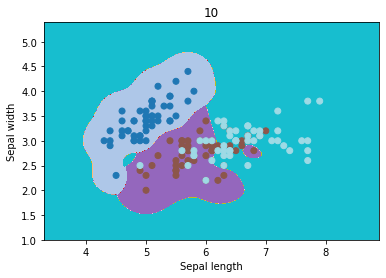

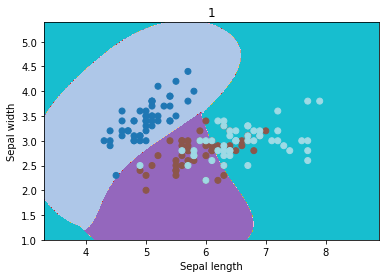

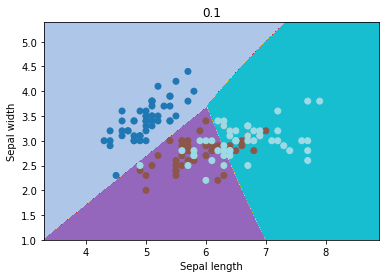

In [8]:
gammas = [10, 1, 1e-1]

for element in gammas:
    svc = svm.SVC(kernel='rbf',gamma=element).fit(X, y)
    plotSVM(element)

From the plots, which value of Gamma appears to be overfitting?

Grid search the Gamma values and print out best one.

In [9]:
gamma_dic = [{'gamma': [10, 1, 1e-1]}]

gamma_search = GridSearchCV(svm.SVC(kernel='rbf'), gamma_dic, cv=10, scoring='accuracy')

gamma_search.fit(X, y)

print(gamma_search.best_params_)

{'gamma': 0.1}
